In [1]:
print("Assignment")

Assignment


In [105]:
import getpass
import requests as rq
from IPython.display import Image
import geocoder

class api_fetcher(object):
    def __init__(self):
        pass
    
    def github_fetch(self):
        user_name = input("\n\n\nEnter your github user name : ")
        print("Enter your top secret passwod : ",end = " ")
        
        try: 
            github_password = getpass.getpass() 
        except Exception as error: 
            print('ERROR', error)
        
        print("Please wait...")
        github = rq.get('https://api.github.com/user', auth=(user_name, github_password))
        
        if github.status_code == 200:
            github_data = github.json()
            something = github_data
            
            github_repos = rq.get(github_data['repos_url'])
            github_repos = github_repos.json()
            
            print("Hey", github_data['name'])
            print("Some of your details, ")
            print("your id is ", github_data['id'], " and your node id is ", github_data['node_id'])
            
            for items in range(len(github_repos)):
                print("Repository number ", items+1, end = " ")
                print(github_repos[items]['name'])
                
            ans = input("Do you want to see more (y/n)")
            if ans == 'y' or ans == 'Y':
                print("public repos : ", github_data['public_repos'])
                print("public gists : ", github_data['public_gists'])
                if github_data['followers'] > 5:
                    print("Wow, you have ", github_data['followers'], " followers")
                print("you have total private repos : ", github_data['total_private_repos'])
                print("and number of your owned private repos is : ",github_data['owned_private_repos'])
                if not github_data['two_factor_authentication']:
                    print("Ohoo! you don't have any two factor authentication")
                else:
                    print("your account is safe ")
            else:
                pass
        else:
            print("Oopps! status code is not 200")
    
    
    
    def random_users(self):
        print("please wait....")
        random_user_api = rq.get("https://randomuser.me/api/")
        random_user_api_json = random_user_api.json()
        data_container = random_user_api_json['results']
        for iterator in range(len(data_container)):
            img_file = data_container[iterator]['picture']['medium']
            print(img_file)
            r = rq.get(img_file)
            print(r)
            with open('random_user.jpg','wb') as f:
                f.write(r.content)
    
    def weather_api(self):
        print("please wait...")
        g = geocoder.ip('me')
        lat = str(g.latlng[0])
        lon = str(g.latlng[1])
        print("long : ", lon)
        print("lat : ", lat)
        my_key = "d1f33dde47c618309a063b43cde61cf5"
        request_api = rq.get("https://samples.openweathermap.org/data/2.5/weather?lat="+ lat +"&lon=" + lon + "&appid="+ my_key)
        request_api_json = request_api.json()
        print(request_api_json)   
    
    
    def news_api(self):
        my_key = "8d9c9c873f79441ca24a20222137d013"
        news_api = rq.get("https://newsapi.org/v2/everything?q=bitcoin&from=2019-12-22&sortBy=publishedAt&apiKey=" + my_key)
        news_api_json = news_api.json()
        for iterator in range(10):
            print("Source Name : ", news_api_json['articles'][iterator]['source']['name'])
            print("\nAuthor : ", news_api_json['articles'][iterator]['author'], end = "\t\t\t\t")
            print("published at : ", news_api_json['articles'][iterator]['publishedAt'])
            print("\nTitle : ", news_api_json['articles'][iterator]['title'])
            print("\nweb URL : ", news_api_json['articles'][iterator]['url'])
           
            print("\nBrief Description : ")
            print("\t", news_api_json['articles'][iterator]['description'])
            print("\nMain Content : ")
            print("\t", news_api_json['articles'][iterator]['content'])
            
            print('\n\n\n')
            
    def space_api(self):
        print("\n\nSpace API fetching ...")
        space_api_request = rq.get("http://api.open-notify.org/astros.json")
        space_json = space_api_request.json()
        
        if space_json['message'] == "success":
            print("\n\n")
            print("Total number of astronaut is ", space_json['number'])
            print("name of the astronauts are : ")
            for iterator in range(len(space_json['people'])):
                print("Name " + space_json['people'][iterator]['name'], end = "\n")
                print("Craft " +  space_json['people'][iterator]['craft'])
                print("\n\n")
        else:
            print("Sorry, Wrong Request")
            

In [106]:
def main():
    api_db = api_fetcher()
    
    print("\n\n1.Fetch my github data ...")
    print("\n2. Generate random user ....")
    print("\n3. Weather details ")
    print("\n3. List of news ...")
    ans =  input("\n\nSelect your choice : ")
    if ans == "1":
        api_db.github_fetch()
    elif ans == "2":
        Image(filename = "random_user.jpg", width = 100)
        api_db.random_users()
    elif ans == "3":
        api_db.weather_api()
    elif ans == "4":
        api_db.news_api()
    elif ans == "5":
        api_db.space_api()
    else:
        print("Wrong Input")

In [107]:
main()



1.Fetch my github data ...

2. Generate random user ....

3. Weather details 

3. List of news ...


Select your choice : 5


Space API fetching ...



Total number of astronaut is  6
name of the astronauts are : 
Name Christina Koch
Craft ISS



Name Alexander Skvortsov
Craft ISS



Name Luca Parmitano
Craft ISS



Name Andrew Morgan
Craft ISS



Name Oleg Skripochka
Craft ISS



Name Jessica Meir
Craft ISS





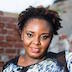

In [94]:
Image(filename = "random_user.jpg", width = 100)